# Data preprocessing notebook

## Output description

## Import libraries

In [1]:
# data manipulation
import pandas as pd

# data vizualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# path
import os
from pathlib import Path

## Setting hyperparameters

In [2]:
# visualization
warnings.filterwarnings('ignore')
%matplotlib inline

# path
path_root_dir = Path(os.getcwd()).parent.parent
path_data = f'{path_root_dir}/data/raw'
path_data

'/Users/bobby/Documents/ML/data/raw'

## Read data 

In [3]:
df = pd.read_csv(f'{path_data}/boston_housing/boston_housing_raw.csv', index_col='ID')

In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


### Basic exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     333 non-null    float64
 1   zn       333 non-null    float64
 2   indus    333 non-null    float64
 3   chas     333 non-null    int64  
 4   nox      333 non-null    float64
 5   rm       333 non-null    float64
 6   age      333 non-null    float64
 7   dis      333 non-null    float64
 8   rad      333 non-null    int64  
 9   tax      333 non-null    int64  
 10  ptratio  333 non-null    float64
 11  black    333 non-null    float64
 12  lstat    333 non-null    float64
 13  medv     333 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 39.0 KB


In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


## Preprocessing

### Check null values

In [7]:
df.isnull().any()

crim       False
zn         False
indus      False
chas       False
nox        False
rm         False
age        False
dis        False
rad        False
tax        False
ptratio    False
black      False
lstat      False
medv       False
dtype: bool

### Check negative values

In [8]:
df[df < 0].any()

crim       False
zn         False
indus      False
chas       False
nox        False
rm         False
age        False
dis        False
rad        False
tax        False
ptratio    False
black      False
lstat      False
medv       False
dtype: bool

## Exploratory data analysis

### Check outliers

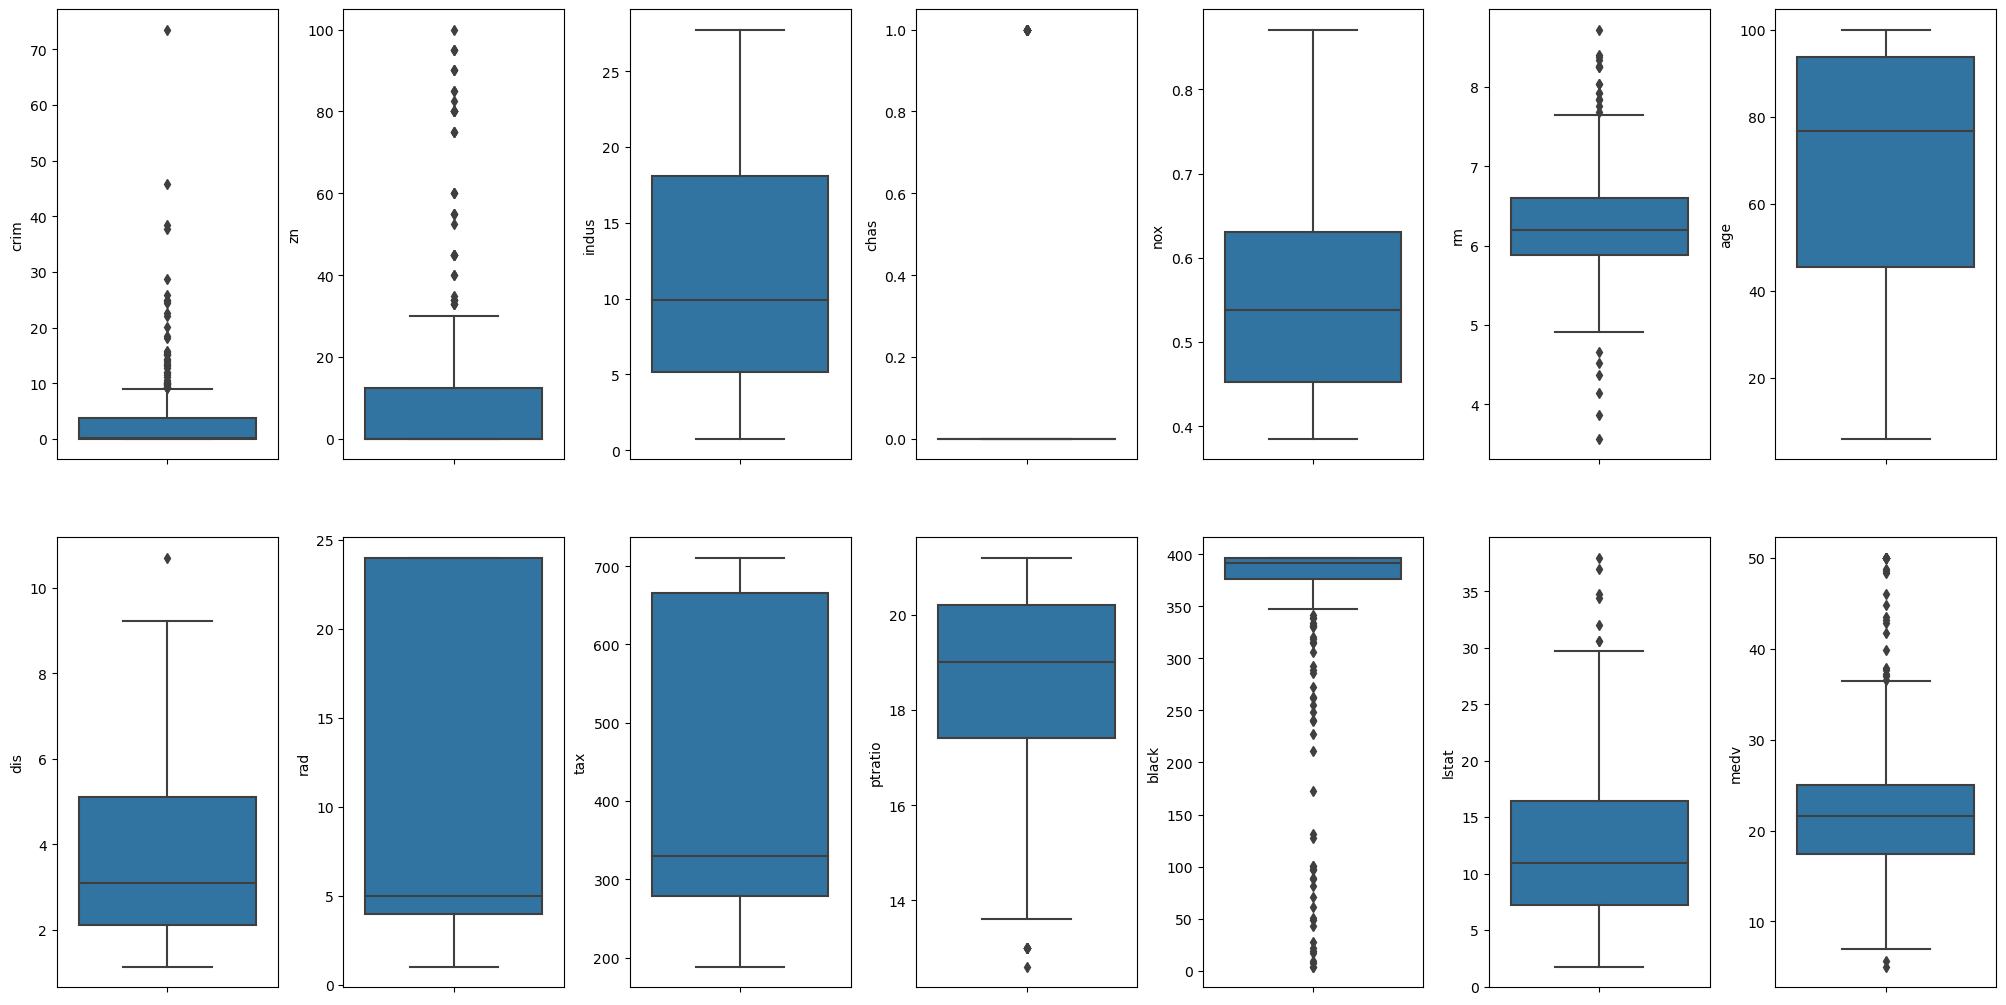

In [9]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
ax = ax.flatten()

index = 0
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

### Check distribution

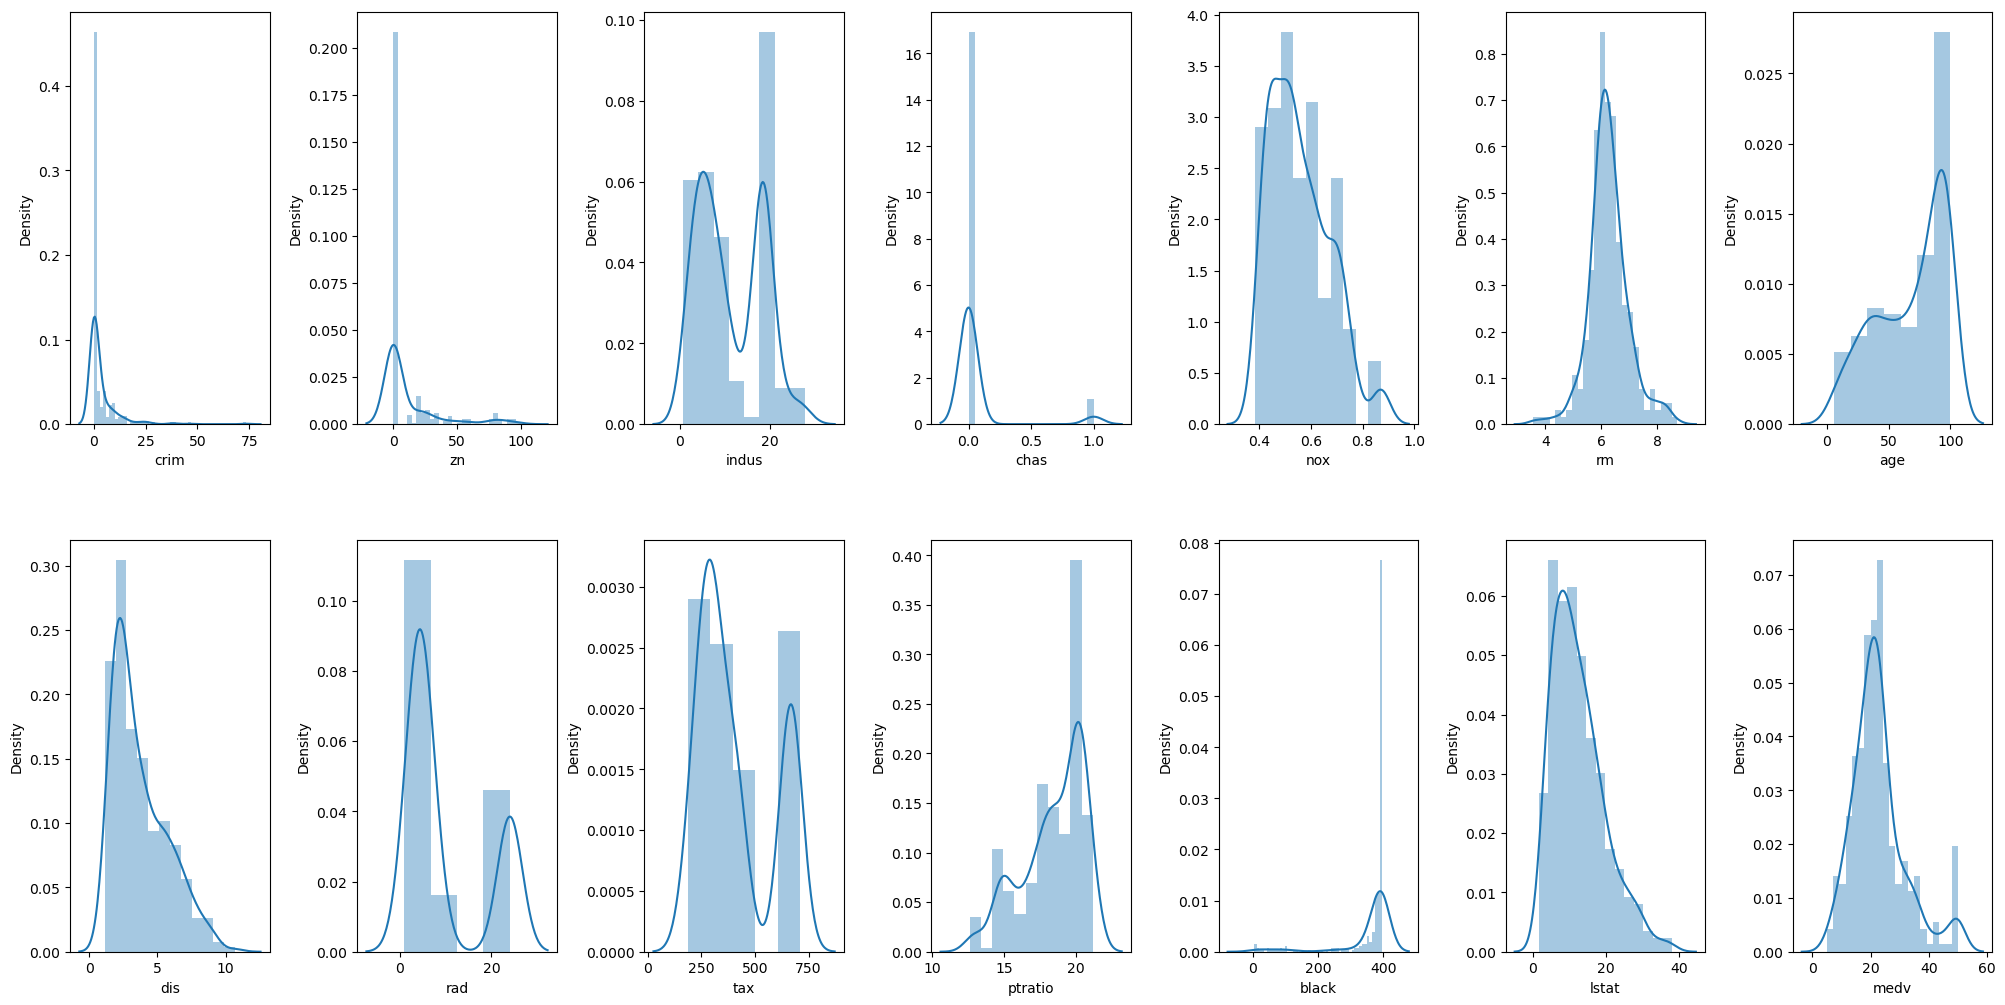

In [10]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
ax = ax.flatten()

index = 0
for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [11]:
# what to do with data distribustions
# Do I need to perform standardization and normalizations for all columns?
# what about some log transformations etc

## Feature dependecies

In [12]:
df_preprocessed = df
df_preprocessed

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6


### Correlation matrix

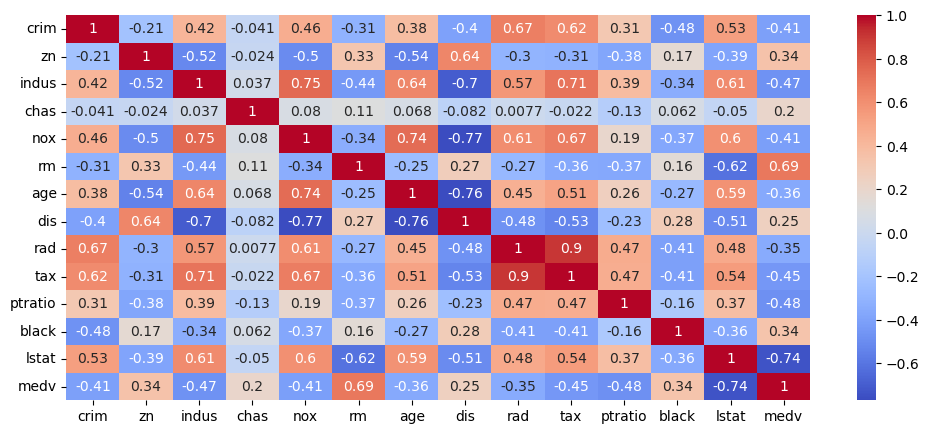

In [13]:
corr = df_preprocessed.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Column 'rad' is highly corelated with column 'tax'. I will remove column 'rad' from the final list of selected features to avoid multicolinearity. Such columns as 'lstat' and 'rm' are corelated with the target variable more than others, so I assume that they are ones of the most important

### Rgression plots

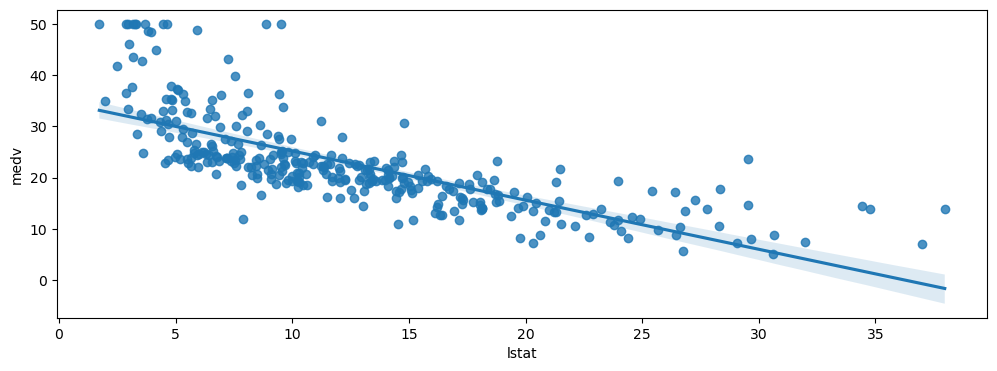

In [14]:
plt.figure(figsize=(12, 4))
sns.regplot(y=df_preprocessed['medv'], x=df_preprocessed['lstat'])
plt.show()

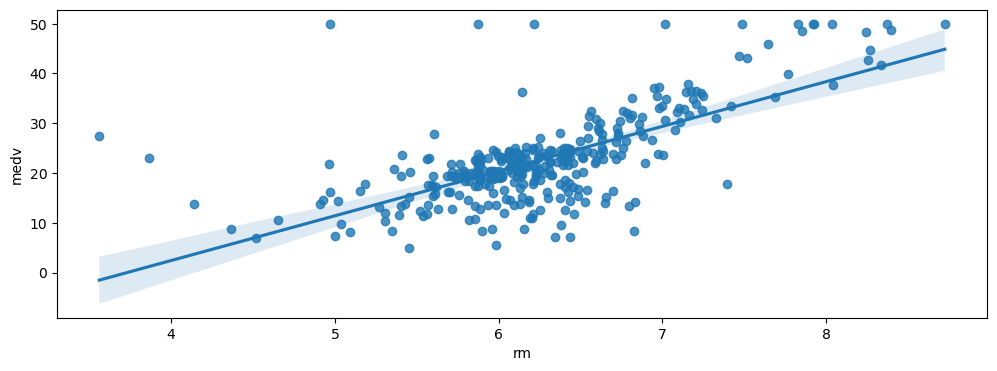

In [15]:
plt.figure(figsize=(12, 4))
sns.regplot(y=df_preprocessed['medv'], x=df_preprocessed['rm'])
plt.show()

## Conclusions

Such features as 'lstat' and 'rm' have stronger influence on the target variable then others

## Saving output

In [16]:
df_preprocessed.to_csv(f'{path_root_dir}/data/interim/boston_housing_preprocessed.csv')